In [3]:
import numpy as np
import dimod
import matplotlib.pyplot as plt
import dwave_networkx as dnx
import networkx as nx
import minorminer
import minorminer.layout as mml
%matplotlib inline
import dwave.inspector
import matplotlib as mpl
import math
from datetime import datetime
from pathlib import Path  
import pandas as pd
import os
import pickle
import random
from scipy.signal import savgol_filter
import h5py
plt.ioff()

####
#CAREFUL - put these files from kagome_embedding.ipynb in the correct folder
####
#load the graph and the dictionary
final_qubit_dictionary = np.load("../data/dict_qbit_to_lattice_periodic.npy", allow_pickle=True).flat[0]
Kag_graph = pickle.load(open('../data/Kag_graph_periodic.pickle', 'rb'))
unit_cells = np.load("../data/unitcells.npy", allow_pickle=True).flat[0]
unit_cells_down = np.load("../data/unitcells_down.npy", allow_pickle=True).flat[0]

#test that it works
#nx.draw(Kag_graph, final_qubit_dictionary)


# Old function for interpolation scheme

You can play around with that on the raw 2D data

In [23]:
from scipy.interpolate import griddata
nk_init = 19
xlim = np.linspace(-2*np.pi, 2*np.pi, 4*(nk_init - 1) + 1)
ylim = np.linspace(-2*np.pi, 2*np.pi, 4*(nk_init - 1) + 1)
#xlim = np.hstack((np.linspace(-2*np.pi, -0.5, 50), np.linspace(0.5, 2*np.pi, 50)))
#ylim = np.hstack((np.linspace(-2*np.pi, -0.5, 50), np.linspace(0.5, 2*np.pi, 50)))
grid_x, grid_y = np.meshgrid(xlim, ylim, indexing='ij')
total_K = []
for i in range(len(kx_vals)):
        total_K.append([kx_vals[i], ky_vals[i]])
total_K = np.array(total_K)
points = total_K
values = finalSQ_spin
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
#possible methods: nearest, square, cubic


#plt.subplot(221)
#plt.imshow(func(grid_x, grid_y).T, extent=(0, 1, 0, 1), origin='lower')
#plt.plot(points[:, 0], points[:, 1], 'k.', ms=1)   # data
#plt.title('Original')
extent_plot = (-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi)
norm = plt.Normalize(0,np.max(values))

cmap = plt.cm.get_cmap('gist_stern_r')
plt.imshow(grid_z0.T, extent=extent_plot, origin='lower', cmap = cmap, norm = norm)
plt.title('Nearest Interpolation of S(q) for Triangle OP')
plt.colorbar()
plt.xlabel(r'$q_x$')
plt.ylabel(r'$q_y$')
theta_list = [2*np.pi*i/6 for i in range(7)]
lside = 4*np.pi/3
for j in range(6):
    plt.plot([lside*np.cos(theta_list[j]), lside*np.cos(theta_list[j+1])], [lside*np.sin(theta_list[j]), lside*np.sin(theta_list[j+1])], 'k-.', lw=2, alpha = 0.4)

#total_K_again, kx, ky = path_Kagome(11)
#for i in range(20):
#    plt.scatter(*total_K_again[i], color = 'black', s = 5)
plt.gcf().set_size_inches(6, 6)
plt.show()

ValueError: different number of values and points

# Only plotting 

Here we plot the structure factor from the already pre computed values, in the folders.

Note that the folder source and the h/J would need to be changed to your own data

The classical part is already done and does not need to be done again.

## Classical, $\Gamma = 0$



Folder for classical ($\Gamma = 0$)

In [132]:
where_to_save = "../data_prathus_runs/processed_FT/"
mainfolder = list(Path(where_to_save).glob('*'))
some_folders = []
jval = 'J=0.66'
#jval = 'J=1.4'
all_h = []
all_hoverJ = []
for folder in mainfolder:
    split_folder = str(folder).split('_')
    #print(split_folder)
    if split_folder[5] == jval:
        some_folders.append(folder)
        h = split_folder[6].split('h')[1][1:-1]
        all_h.append(h)
        all_hoverJ.append(float(h)/float(jval[2:]))
#    print(str(folder))
#print(mainfolder)
print(some_folders)
print(all_h)
print(all_hoverJ)

index_plot = 5
file_name = where_to_save + "3D_FT_" + jval + "_h=" + all_h[index_plot] + ".hdf5"
data = h5py.File(file_name, 'r')

kx_vals = data['kx']
ky_vals = data['ky']
finalSQ_spin = np.absolute(data['avg_sigmasigma'])

file_name = where_to_save + "line_FT_" + jval + "_h=" + all_h[index_plot] + ".hdf5"
data2 = h5py.File(file_name, 'r')

kx_vals_line = data2['kx']
ky_vals_line = data2['ky']
total_K = []
flat_kx = np.array(kx_vals_line).flatten()
flat_ky = np.array(ky_vals_line).flatten()
for i in range(len(flat_kx)):
        total_K.append([flat_kx[i], flat_ky[i]])
total_K = np.array(total_K)
finalSQ_spin_line = np.absolute(data2['avg_sigmasigma'])

[PosixPath('../data_prathus_runs/processed_FT/line_FT_J=0.66_h=0.0.hdf5'), PosixPath('../data_prathus_runs/processed_FT/line_FT_J=0.66_h=2.7199999999999998.hdf5'), PosixPath('../data_prathus_runs/processed_FT/line_FT_J=0.66_h=0.6399999999999997.hdf5'), PosixPath('../data_prathus_runs/processed_FT/3D_FT_J=0.66_h=0.0.hdf5'), PosixPath('../data_prathus_runs/processed_FT/3D_FT_J=0.66_h=2.7199999999999998.hdf5'), PosixPath('../data_prathus_runs/processed_FT/line_FT_J=0.66_h=1.92.hdf5'), PosixPath('../data_prathus_runs/processed_FT/3D_FT_J=0.66_h=1.2800000000000002.hdf5'), PosixPath('../data_prathus_runs/processed_FT/3D_FT_J=0.66_h=1.92.hdf5'), PosixPath('../data_prathus_runs/processed_FT/3D_FT_J=0.66_h=0.6399999999999997.hdf5'), PosixPath('../data_prathus_runs/processed_FT/line_FT_J=0.66_h=1.2800000000000002.hdf5')]
['0.0', '2.7199999999999998', '0.6399999999999997', '0.0', '2.7199999999999998', '1.92', '1.2800000000000002', '1.92', '0.6399999999999997', '1.2800000000000002']
[0.0, 4.121212

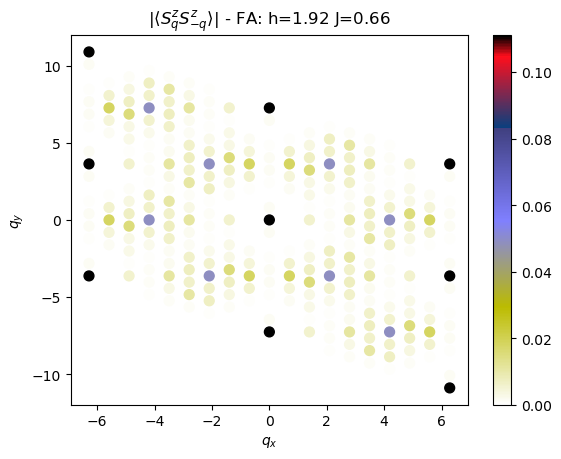

In [133]:
norm = plt.Normalize(0,(1/3)**2)
cmap = plt.cm.get_cmap('gist_stern_r')
#finalSQ_spin = np.absolute(structure_factor)
#finalSQ = final_spin_Q2 - final_spin_Q**2
plt.scatter(kx_vals, ky_vals, s=50, c=finalSQ_spin, cmap=cmap, norm=norm)
plt.colorbar()
theta_list = [2*np.pi*i/6 for i in range(7)]
lside = 4*np.pi/3
#for j in range(6):
#    plt.plot([lside*np.cos(theta_list[j]), lside*np.cos(theta_list[j+1])],
#     [lside*np.sin(theta_list[j]), lside*np.sin(theta_list[j+1])], 'k-.', lw=2, alpha = 0.4)
# total_K_again, kx, ky = path_Kagome(6)
# for i in range(len(total_K_again)):
#     plt.scatter(*total_K_again[i], color = 'black', s = 100, alpha = 0.1)
plt.xlabel(r'$q_x$')
plt.ylabel(r'$q_y$')
plt.title(r'$S(q)$, with 1st Brillouin Zone')
#plt.title("h/J=" + hoverJ_apq[1] + " s=" + str(0.7))
plt.title(r'$|\langle S^z_q S^z_{-q} \rangle |$' + " - FA: h=" + all_h[index_plot] + " " + jval);

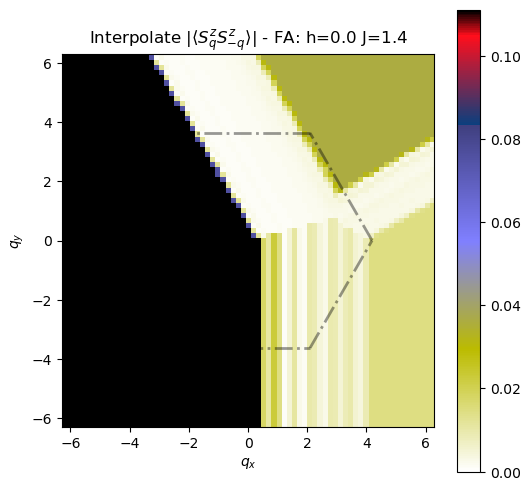

In [77]:
from scipy.interpolate import griddata
nk_init = 19
xlim = np.linspace(-2*np.pi, 2*np.pi, 4*(nk_init - 1) + 1)
ylim = np.linspace(-2*np.pi, 2*np.pi, 4*(nk_init - 1) + 1)
#xlim = np.hstack((np.linspace(-2*np.pi, -0.5, 50), np.linspace(0.5, 2*np.pi, 50)))
#ylim = np.hstack((np.linspace(-2*np.pi, -0.5, 50), np.linspace(0.5, 2*np.pi, 50)))
grid_x, grid_y = np.meshgrid(xlim, ylim, indexing='ij')
total_K = []
flat_kx = np.array(kx_vals).flatten()
flat_ky = np.array(ky_vals).flatten()
for i in range(len(flat_kx)):
        total_K.append([flat_kx[i], flat_ky[i]])
total_K = np.array(total_K)
points = total_K
values = finalSQ_spin
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
#possible methods: nearest, square, cubic


#plt.subplot(221)
#plt.imshow(func(grid_x, grid_y).T, extent=(0, 1, 0, 1), origin='lower')
#plt.plot(points[:, 0], points[:, 1], 'k.', ms=1)   # data
#plt.title('Original')
extent_plot = (-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi)
norm = plt.Normalize(0,(1/3)**2)

cmap = plt.cm.get_cmap('gist_stern_r')
plt.imshow(grid_z0.T, extent=extent_plot, origin='lower', cmap = cmap, norm = norm)
plt.title(r'Interpolate $|\langle S^z_q S^z_{-q} \rangle |$' + " - FA: h=" + all_h[index_plot] + " " + jval);
plt.colorbar()
plt.xlabel(r'$q_x$')
plt.ylabel(r'$q_y$')
theta_list = [2*np.pi*i/6 for i in range(7)]
lside = 4*np.pi/3
for j in range(6):
    plt.plot([lside*np.cos(theta_list[j]), lside*np.cos(theta_list[j+1])], [lside*np.sin(theta_list[j]), lside*np.sin(theta_list[j+1])], 'k-.', lw=2, alpha = 0.4)

#total_K_again, kx, ky = path_Kagome(11)
#for i in range(20):
#    plt.scatter(*total_K_again[i], color = 'black', s = 5)
plt.gcf().set_size_inches(6, 6)
plt.show()

Line plots

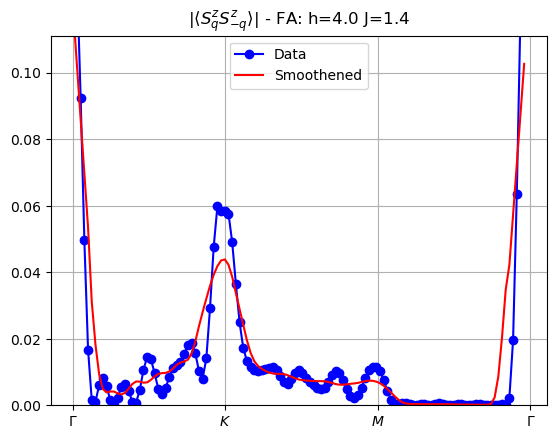

In [78]:
#import Gamma = 0 data
index_plot = 4
#1, 5, 0, 4
file_name = where_to_save + "line_FT_"+jval+"_h=" + all_h[index_plot] +".hdf5"
#import finite Gamma 
#file_name = where_to_save + "3D_FT_h=" + hoverJ_apq[1] + "_s=s=" + str(0.2) + ".hdf5"

data = h5py.File(file_name, 'r')

kx_vals = data['kx']
ky_vals = data['ky']
finalSQ_spin = np.absolute(data['avg_sigmasigma'])

numKpoints = len(finalSQ_spin)
xticks = np.array([0, numKpoints, 2*numKpoints + 1, 3*numKpoints + 2])/3
xticks_label = [r"$\Gamma$", r"$K$", r"$M$",r"$\Gamma$"]

yhat = savgol_filter(finalSQ_spin, 10, 1)

plt.plot(finalSQ_spin, marker = 'o', c = 'blue', label = 'Data')
plt.plot(yhat, linestyle = '-', c = 'red', label = 'Smoothened')
plt.ylim([0,(1/3)**2])
plt.xticks(ticks = xticks, labels = xticks_label);
plt.legend()
plt.title(r'$|\langle S^z_q S^z_{-q} \rangle |$' + " - FA: h=" + all_h[index_plot] + " " + jval);
plt.grid()

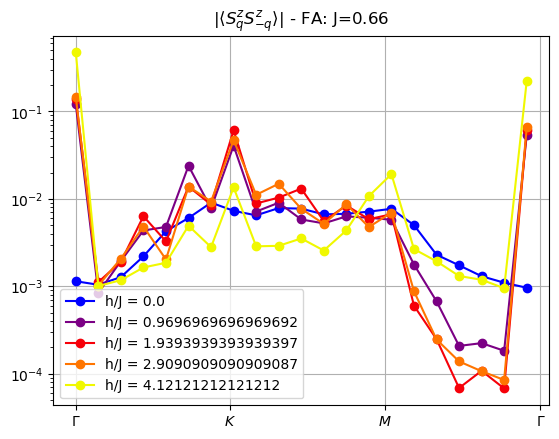

In [87]:
#import Gamma = 0 data
#indices = [1,5,0,4] #jval = 1.4
indices = [0,2,6,5,1] #jval = 0.66

cvals  = [0., 2.0, 4.0, 6.0]
colors = ["blue","red","yellow", "green"]

import matplotlib.colors as mc

norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = mc.LinearSegmentedColormap.from_list("", tuples)
step = 6
for index_plot in indices:
    #1, 5, 0, 4
    file_name = where_to_save + "line_FT_"+jval+"_h=" + all_h[index_plot] +".hdf5"
    data = h5py.File(file_name, 'r')
    finalSQ_spin = np.absolute(data['avg_sigmasigma'])
    hoverj = float(all_h[index_plot])/float(jval[2:])
    range_plot = np.arange(0,len(finalSQ_spin), step)
    plt.plot(finalSQ_spin[range_plot], marker = 'o', c = cmap(hoverj/6.0), label = 'h/J = ' + str(hoverj))
numKpoints = len(finalSQ_spin)
xticks = np.array([0, numKpoints, 2*numKpoints + 1, 3*numKpoints + 2])/3 /step
xticks_label = [r"$\Gamma$", r"$K$", r"$M$",r"$\Gamma$"]
#plt.ylim([0,(1/3)**2])
plt.xticks(ticks = xticks, labels = xticks_label);
plt.legend()
plt.yscale('log')
plt.title(r'$|\langle S^z_q S^z_{-q} \rangle |$' + " - FA: " + jval);
plt.grid()

## Quantum, finite $s_p$

In [4]:
# # change the folder!!
# where_to_save = "../../data_prathus_runs/processed_FT/"
# hoverJ_apq = ['0.000', '2.004', '3.908', '5.211', '0.501', '2.505', '1.503', '3.006', '3.507', '1.002']
# slist = ['s=s=0.2', 's=s=0.7']

# change the folder!!
where_to_save = "../../data_prathus_runs/processedFT2/"
hoverJ_apq = ['0', '1', '2', '3']
slist = ['s=0.15', 's=0.65']

An example test.

In [9]:
tag1 = hoverJ_apq[1]
print(tag1)
# tag2 = 's=s=0.2'
tag2 = slist[1]
print(tag2)

file_name = where_to_save + "3D_FT_h=" + tag1 + "_" + tag2 + ".hdf5"
data = h5py.File(file_name, 'r')

# kx_vals = data['kx']
# ky_vals = data['ky']
total_K = data['total_K']
finalSQ_spin = np.absolute(data['avg_sigmasigma'])

file_name = where_to_save + "line_FT_h=" + tag1 + "_" + tag2 + ".hdf5"
data2 = h5py.File(file_name, 'r')

# kx_vals_line = data2['kx']
# ky_vals_line = data2['ky']
# total_K = []
# flat_kx = np.array(kx_vals_line).flatten()
# flat_ky = np.array(ky_vals_line).flatten()
# for i in range(len(flat_kx)):
#         total_K.append([flat_kx[i], flat_ky[i]])
# total_K = np.array(total_K)
# total_K = data2['total_K']
# finalSQ_spin_line = np.absolute(data2['avg_sigmasigma'])

1
s=0.65


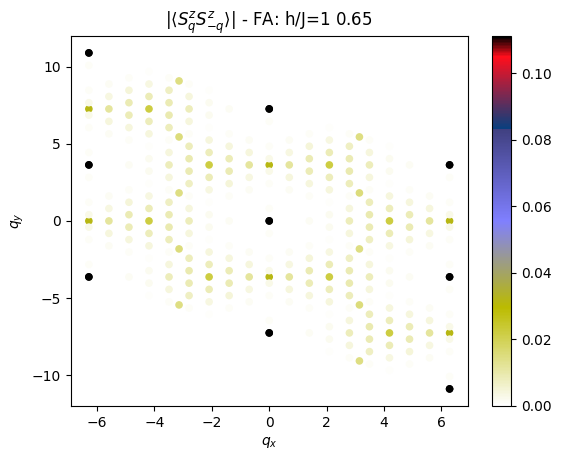

In [12]:
norm = plt.Normalize(0,(1/3)**2)
cmap = mpl.colormaps['gist_stern_r']
#finalSQ_spin = np.absolute(structure_factor)
#finalSQ = final_spin_Q2 - final_spin_Q**2
plt.scatter(total_K[:,0], total_K[:,1], s=20, c=finalSQ_spin, cmap=cmap, norm=norm)
plt.colorbar()
theta_list = [2*np.pi*i/6 for i in range(7)]
lside = 4*np.pi/3
#for j in range(6):
#    plt.plot([lside*np.cos(theta_list[j]), lside*np.cos(theta_list[j+1])],
#     [lside*np.sin(theta_list[j]), lside*np.sin(theta_list[j+1])], 'k-.', lw=2, alpha = 0.4)
# total_K_again, kx, ky = path_Kagome(6)
# for i in range(len(total_K_again)):
#     plt.scatter(*total_K_again[i], color = 'black', s = 100, alpha = 0.1)
plt.xlabel(r'$q_x$')
plt.ylabel(r'$q_y$')
plt.title(r'$S(q)$, with 1st Brillouin Zone')
#plt.title("h/J=" + hoverJ_apq[1] + " s=" + str(0.7))
plt.title(r'$|\langle S^z_q S^z_{-q} \rangle |$' + " - FA: h/J=" + tag1 + " " + tag2[2:]);
plt.show()

/tmp/ipykernel_828/1150643471.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('gist_stern_r')


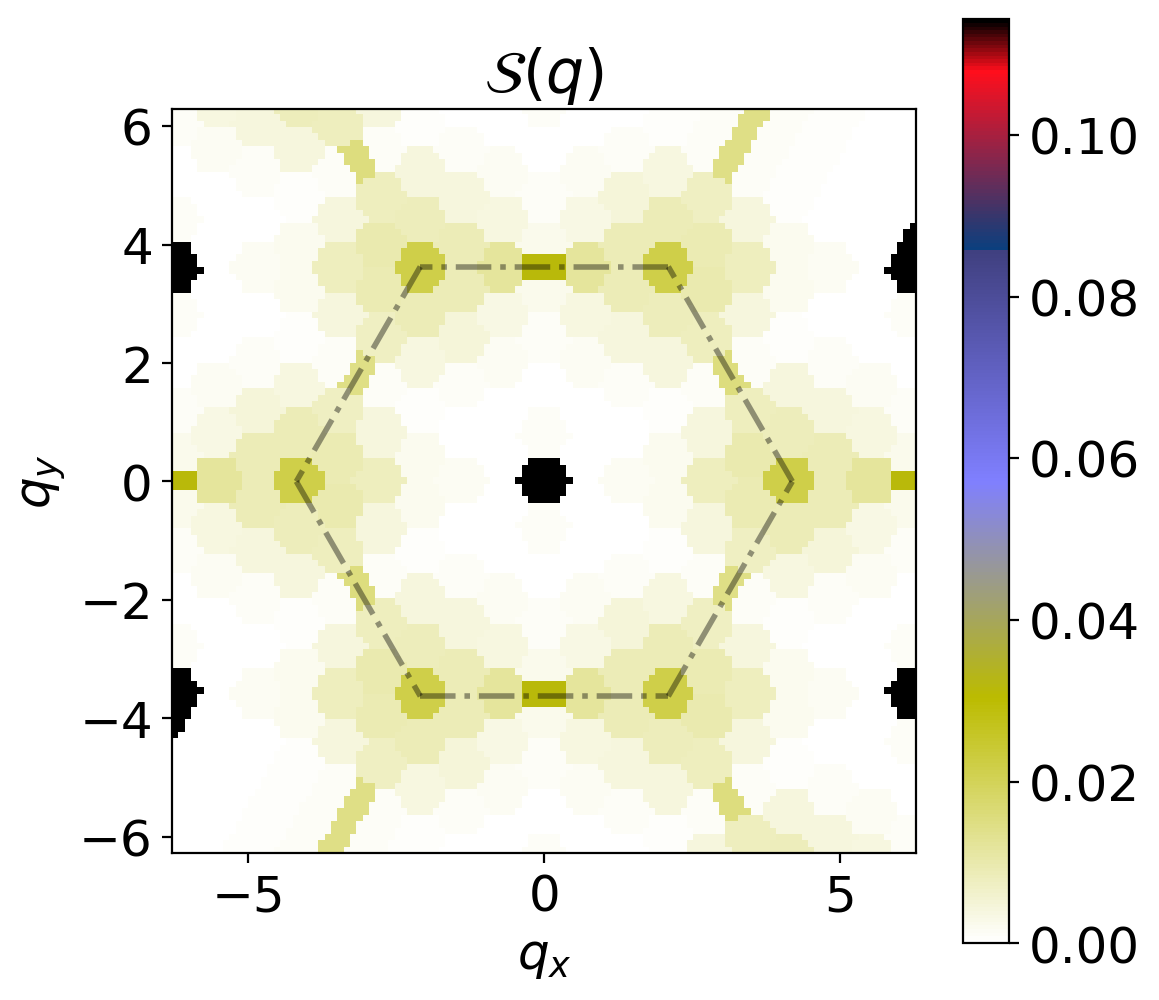

In [15]:
from scipy.interpolate import griddata
nk_init = 30
xlim = np.linspace(-2*np.pi, 2*np.pi, 4*(nk_init - 1) + 1)
ylim = np.linspace(-2*np.pi, 2*np.pi, 4*(nk_init - 1) + 1)
#xlim = np.hstack((np.linspace(-2*np.pi, -0.5, 50), np.linspace(0.5, 2*np.pi, 50)))
#ylim = np.hstack((np.linspace(-2*np.pi, -0.5, 50), np.linspace(0.5, 2*np.pi, 50)))
grid_x, grid_y = np.meshgrid(xlim, ylim, indexing='ij')
points = total_K
values = finalSQ_spin
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
#possible methods: nearest, square, cubic

plt.rcParams['figure.dpi'] = 200
plt.rcParams.update({'font.size':18})
plt.figure(figsize=(7,5))


#plt.subplot(221)
#plt.imshow(func(grid_x, grid_y).T, extent=(0, 1, 0, 1), origin='lower')
#plt.plot(points[:, 0], points[:, 1], 'k.', ms=1)   # data
#plt.title('Original')
extent_plot = (-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi)
norm = plt.Normalize(0,np.max(values))

cmap = plt.cm.get_cmap('gist_stern_r')
plt.imshow(grid_z0.T, extent=extent_plot, origin='lower', cmap = cmap, norm = norm)
# plt.title('Nearest Interpolation of S(q) for Triangle OP')
plt.title(r'$\mathcal{S}(q)$')
plt.colorbar()
plt.xlabel(r'$q_x$')
plt.ylabel(r'$q_y$')
theta_list = [2*np.pi*i/6 for i in range(7)]
lside = 4*np.pi/3
for j in range(6):
    plt.plot([lside*np.cos(theta_list[j]), lside*np.cos(theta_list[j+1])], [lside*np.sin(theta_list[j]), lside*np.sin(theta_list[j+1])], 'k-.', lw=2, alpha = 0.4)

#total_K_again, kx, ky = path_Kagome(11)
#for i in range(20):
#    plt.scatter(*total_K_again[i], color = 'black', s = 5)
plt.gcf().set_size_inches(6, 6)
plt.show()

Line pot:

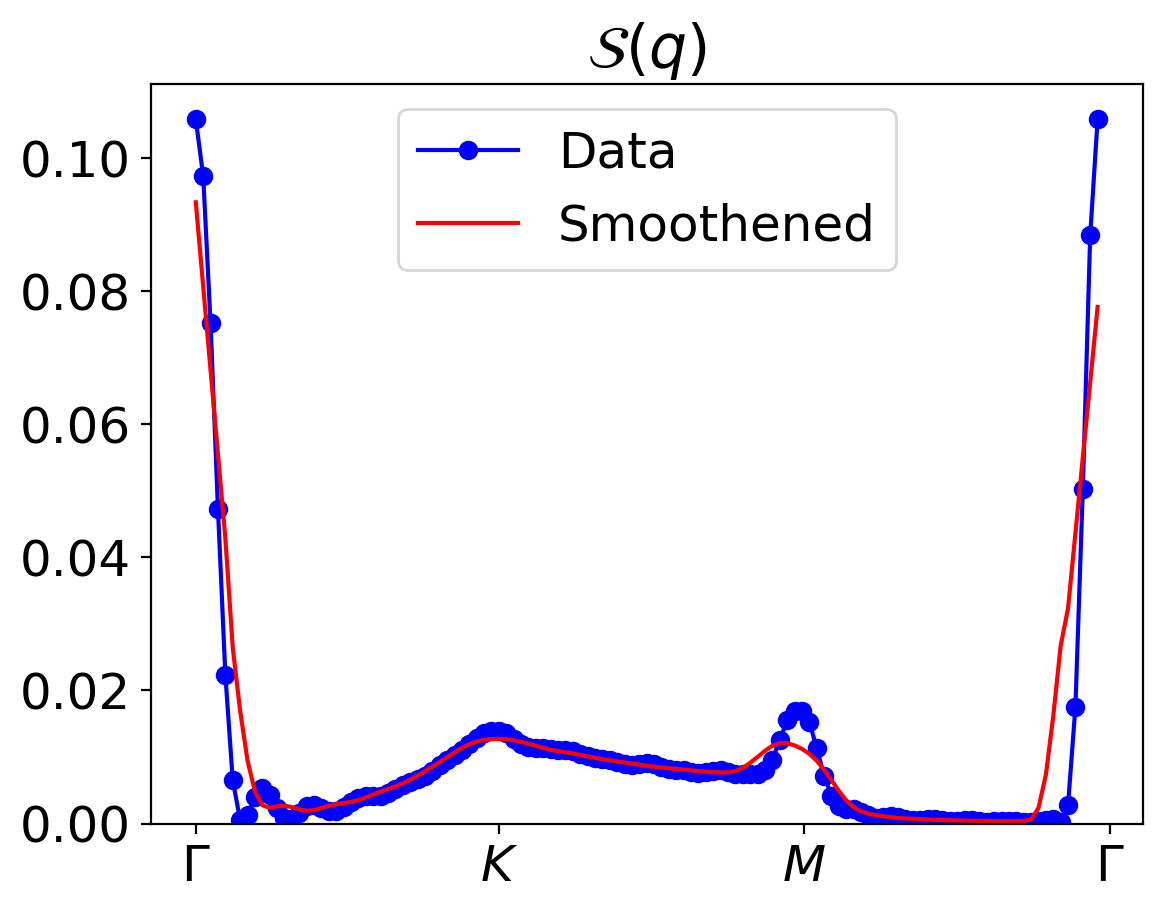

In [26]:
tag1 = hoverJ_apq[2]
tag2 = slist[0]

file_name = where_to_save + "line_FT_h=" + tag1 + "_" + tag2 + ".hdf5"
data2 = h5py.File(file_name, 'r')
finalSQ_spin_line = np.absolute(data2['avg_sigmasigma'])

fig1 = plt.figure()
ax1 = fig1.gca()

# norm = plt.Normalize(0,(1/3)**2)        
# cmap = mpl.colormaps['gist_stern_r']

numKpoints = len(finalSQ_spin_line)
# numKpoints = 40
xticks = np.array([0, numKpoints, 2*numKpoints + 1, 3*numKpoints + 2])/3
xticks_label = [r"$\Gamma$", r"$K$", r"$M$",r"$\Gamma$"]

yhat = savgol_filter(finalSQ_spin_line, 10, 1)

plt.plot(finalSQ_spin_line, marker = 'o', c = 'blue', label = 'Data')
plt.plot(yhat, linestyle = '-', c = 'red', label = 'Smoothened')
plt.ylim([0,(1/3)**2])
plt.xticks(ticks = xticks, labels = xticks_label);
plt.legend()
plt.title(r'$\mathcal{S}(q)$');
plt.show()

In [25]:
tag1

'0'

### Doing all the plots at once.

Careful, this will drop all of the plots into a given folder!!

Firstly, the 3D FT for the spins.

In [11]:
for ind1 in range(10):
# for ind1 in [3]:
    for ind2 in range(2):
        tag1 = hoverJ_apq[ind1]
        print(tag1)
        tag2 = slist[ind2]
        print(tag2)

        file_name = where_to_save + "3D_FT_h=" + tag1 + "_" + tag2 + ".hdf5"
        data = h5py.File(file_name, 'r')

        total_K = data['total_K']
        kx_vals = total_K[:,0]
        ky_vals = total_K[:,1]
        finalSQ_spin = np.absolute(data['avg_sigmasigma'])
        
        fig1 = plt.figure()
        ax1 = fig1.gca()

        norm = plt.Normalize(0,(1/3)**2)        
        if ind1 == 3:
            norm = plt.Normalize(0,(1)**2)
        cmap = mpl.colormaps['gist_stern_r']
        #finalSQ_spin = np.absolute(structure_factor)
        #finalSQ = final_spin_Q2 - final_spin_Q**2
        plt.scatter(kx_vals, ky_vals, s=50, c=finalSQ_spin, cmap=cmap, norm=norm)
        axb = plt.colorbar()
        theta_list = [2*np.pi*i/6 for i in range(7)]
        lside = 4*np.pi/3
        #for j in range(6):
        #    plt.plot([lside*np.cos(theta_list[j]), lside*np.cos(theta_list[j+1])],
        #     [lside*np.sin(theta_list[j]), lside*np.sin(theta_list[j+1])], 'k-.', lw=2, alpha = 0.4)
        # total_K_again, kx, ky = path_Kagome(6)
        # for i in range(len(total_K_again)):
        #     plt.scatter(*total_K_again[i], color = 'black', s = 100, alpha = 0.1)
        plt.xlabel(r'$q_x$')
        plt.ylabel(r'$q_y$')
        #plt.title("h/J=" + hoverJ_apq[1] + " s=" + str(0.7))
        plt.title(r'$|\langle S^z_q S^z_{-q} \rangle |$' + " - APQ: h/J=" + tag1 + " " + tag2[2:]);
        plt.savefig(where_to_save + "fig_3DFT_hJ=" + tag1 + "_" + tag2[2:] + ".png")
        plt.close()

        print('done')

0.000
s=s=0.2
done
0.000
s=s=0.7
done
2.004
s=s=0.2
done
2.004
s=s=0.7
done
3.908
s=s=0.2
done
3.908
s=s=0.7
done
5.211
s=s=0.2
done
5.211
s=s=0.7
done
0.501
s=s=0.2
done
0.501
s=s=0.7
done
2.505
s=s=0.2
done
2.505
s=s=0.7
done
1.503
s=s=0.2
done
1.503
s=s=0.7
done
3.006
s=s=0.2
done
3.006
s=s=0.7
done
3.507
s=s=0.2
done
3.507
s=s=0.7
done
1.002
s=s=0.2
done
1.002
s=s=0.7
done


This is for the line FT:

In [12]:
for ind1 in range(10):
# for ind1 in [3]:
    for ind2 in range(2):
        tag1 = hoverJ_apq[ind1]
        print(tag1)
        tag2 = slist[ind2]
        print(tag2)

        file_name = where_to_save + "line_FT_h=" + tag1 + "_" + tag2 + ".hdf5"
        data2 = h5py.File(file_name, 'r')
        finalSQ_spin_line = np.absolute(data2['avg_sigmasigma'])

        fig1 = plt.figure()
        ax1 = fig1.gca()

        norm = plt.Normalize(0,(1/3)**2)        
        if ind1 == 3:
            norm = plt.Normalize(0,(1)**2)
        cmap = mpl.colormaps['gist_stern_r']

        # numKpoints = len(finalSQ_spin)
        numKpoints = 40
        xticks = np.array([0, numKpoints, 2*numKpoints + 1, 3*numKpoints + 2])/3
        xticks_label = [r"$\Gamma$", r"$K$", r"$M$",r"$\Gamma$"]

        yhat = savgol_filter(finalSQ_spin, 10, 1)

        plt.plot(finalSQ_spin, marker = 'o', c = 'blue', label = 'Data')
        plt.plot(yhat, linestyle = '-', c = 'red', label = 'Smoothened')
        plt.ylim([0,(1/3)**2])
        plt.xticks(ticks = xticks, labels = xticks_label);
        plt.legend()
        plt.title(r'$|\langle S^z_q S^z_{-q} \rangle |$' + " - APQ: h/J=" + tag1 + " " + tag2[2:]);
        plt.savefig(where_to_save + "fig_lineFT_hJ=" + tag1 + "_" + tag2[2:] + ".png")
        # plt.grid()
        plt.close()
        print('done')

0.000
s=s=0.2
0.000
s=s=0.7
2.004
s=s=0.2
2.004
s=s=0.7
3.908
s=s=0.2
3.908
s=s=0.7
5.211
s=s=0.2
5.211
s=s=0.7
0.501
s=s=0.2
0.501
s=s=0.7
2.505
s=s=0.2
2.505
s=s=0.7
1.503
s=s=0.2
1.503
s=s=0.7
3.006
s=s=0.2
3.006
s=s=0.7
3.507
s=s=0.2
3.507
s=s=0.7
1.002
s=s=0.2
1.002
s=s=0.7


The dimer FT from the files

In [ ]:
for ind1 in range(10):
# for ind1 in [3]:
    for ind2 in range(2):
        tag1 = hoverJ_apq[ind1]
        print(tag1)
        tag2 = slist[ind2]
        print(tag2)

        file_name = where_to_save + "dimer_FT_h=" + tag1 + "_" + tag2 + ".hdf5"
        data = h5py.File(file_name, 'r')

        total_K = data['total_K']
        kx_vals = total_K[:,0]
        ky_vals = total_K[:,1]
        finalSQ_spin = np.absolute(data['avg_sigmasigma'])

        fig1 = plt.figure()
        ax1 = fig1.gca()

        norm = plt.Normalize(0,(1/3)**2)        
        if ind1 == 3:
            norm = plt.Normalize(0,(1)**2)
        cmap = mpl.colormaps['gist_stern_r']
        #finalSQ_spin = np.absolute(structure_factor)
        #finalSQ = final_spin_Q2 - final_spin_Q**2
        plt.scatter(kx_vals, ky_vals, s=50, c=finalSQ_spin, cmap=cmap, norm=norm)
        axb = plt.colorbar()
        theta_list = [2*np.pi*i/6 for i in range(7)]
        lside = 4*np.pi/3
        #for j in range(6):
        #    plt.plot([lside*np.cos(theta_list[j]), lside*np.cos(theta_list[j+1])],
        #     [lside*np.sin(theta_list[j]), lside*np.sin(theta_list[j+1])], 'k-.', lw=2, alpha = 0.4)
        # total_K_again, kx, ky = path_Kagome(6)
        # for i in range(len(total_K_again)):
        #     plt.scatter(*total_K_again[i], color = 'black', s = 100, alpha = 0.1)
        plt.xlabel(r'$q_x$')
        plt.ylabel(r'$q_y$')
        #plt.title("h/J=" + hoverJ_apq[1] + " s=" + str(0.7))
        plt.title(r'$|\langle S^z_q S^z_{-q} \rangle |$' + " - APQ: h/J=" + tag1 + " " + tag2[2:]);
        plt.savefig(where_to_save + "fig_dimerFT_hJ=" + tag1 + "_" + tag2[2:] + ".png")
        plt.close()

        print('done')

A given $s_p$, for the line FT, and compare some h/J

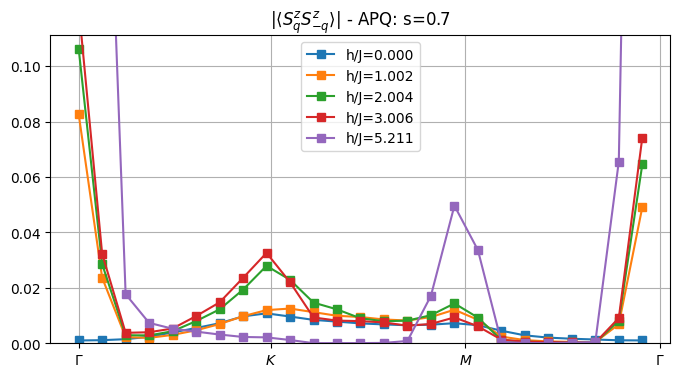

In [14]:
#some h, s=0.7

fig1 = plt.figure(figsize = (8,4))
ax1 = fig1.gca()

norm = plt.Normalize(0,(1/3)**2)        
cmap = mpl.colormaps['gist_stern_r']
step = 5 #line_k_point step, not all points are to be shown in the filter function. We smoothen the actual data
some_hJ = [0, 9, 1, 7, 3] #this picks only select h/J from the full list

for ind1 in some_hJ:
# for ind1 in [3]:
    for ind2 in [1]:
        tag1 = hoverJ_apq[ind1]
        tag2 = slist[ind2]

        file_name = where_to_save + "line_FT_h=" + tag1 + "_" + tag2 + ".hdf5"
        data2 = h5py.File(file_name, 'r')

        finalSQ_spin_line = np.absolute(data2['avg_sigmasigma'])

        yhat = savgol_filter(finalSQ_spin, 10, 1)

        #plt.plot(finalSQ_spin, marker = 'o', c = cmap(), label = 'Data')
        orders = np.arange(0, len(yhat), step)
        plt.plot(yhat[orders], marker = 's', linestyle = '-', label = 'h/J=' + tag1)
        
numKpoints = len(finalSQ_spin)
xticks = np.array([0, numKpoints, 2*numKpoints + 1, 3*numKpoints + 2])/3 /step
xticks_label = [r"$\Gamma$", r"$K$", r"$M$",r"$\Gamma$"]
plt.ylim([0,(1/3)**2])
plt.xticks(ticks = xticks, labels = xticks_label);
plt.legend()
plt.title(r'$|\langle S^z_q S^z_{-q} \rangle |$' + " - APQ: " + tag2[2:]);
plt.savefig(where_to_save + "compare_APQ: " + tag2[2:] + ".png")
plt.grid()
plt.show()